In [1]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("Newspaper"):
    for document in os.listdir("Newspaper/"+category):
        with open("Newspaper/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
len(X)

19997

In [5]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [6]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [7]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [8]:
#Demonstrating re.split
sample_text="Hey! I am Gaurav. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Gaurav', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


In [9]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'xref': 4579,
 'cantaloupe': 19565,
 'srv': 24331,
 'cmu': 39286,
 'edu': 122795,
 'comp': 9646,
 'windows': 5671,
 'motif': 730,
 'path': 15301,
 'crabapple': 4696,
 'ece': 4104,
 'europa': 4132,
 'eng': 5210,
 'gtefsd': 4117,
 'com': 37990,
 'gatech': 3317,
 'usenet': 6242,
 'ufl': 610,
 'spool': 432,
 'uwm': 1392,
 'zaphod': 6203,
 'mps': 6882,
 'ohio': 11857,
 'state': 14080,
 'sdd': 1030,
 'elroy': 678,
 'jpl': 1196,
 'nasa': 2975,
 'gov': 3872,
 'decwrl': 525,
 'dec': 817,
 'tantalus': 4,
 'gringort': 3,
 'joel': 114,
 'gringorten': 2,
 'newsgroups': 15330,
 'subject': 16229,
 'cursor': 162,
 'size': 694,
 'problems': 1363,
 'date': 15612,
 'apr': 15422,
 'gmt': 13326,
 'organization': 14889,
 'western': 650,
 'software': 2322,
 'laboratory': 406,
 'lines': 15682,
 'distribution': 3616,
 'world': 4015,
 'message': 16495,
 'references': 9734,
 'compsci': 28,
 'liverpool': 80,
 'reply': 3247,
 'nntp': 7038,
 'posting': 7414,
 'host': 6744,
 'article': 10143,
 'mbell': 7,
 'csc': 3

In [10]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122795),
 ('cmu', 39286),
 ('com', 37990),
 ('news', 25742),
 ('not', 25312),
 ('srv', 24331),
 ('cantaloupe', 19565),
 ('net', 19240),
 ('message', 16495),
 ('subject', 16229),
 ('lines', 15682),
 ('date', 15612),
 ('apr', 15422),
 ('newsgroups', 15330),
 ('path', 15301),
 ('can', 15148),
 ('organization', 14889),
 ('state', 14080),
 ('gmt', 13326),
 ('one', 11895),
 ('ohio', 11857),
 ('will', 11534),
 ('writes', 11061),
 ('article', 10143),
 ('references', 9734),
 ('comp', 9646),
 ('talk', 9289),
 ('misc', 8974),
 ('ans', 8333),
 ('sender', 8265),
 ('howland', 8260),
 ('reston', 8239),
 ('don', 8040),
 ('like', 7787),
 ('people', 7763),
 ('just', 7546),
 ('university', 7437),
 ('posting', 7414),
 ('nntp', 7038),
 ('know', 6945),
 ('mps', 6882),
 ('host', 6744),
 ('sci', 6591),
 ('get', 6567),
 ('usenet', 6242),
 ('think', 6231),
 ('zaphod', 6203),
 ('may', 6173),
 ('alt', 5988),
 ('politics', 5955),
 ('also', 5822),
 ('windows', 5671),
 ('time', 5333),
 ('use', 5300),
 ('har

In [11]:
import matplotlib.pyplot as plt


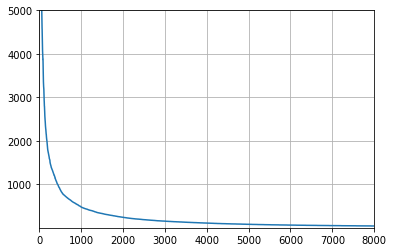

In [12]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [13]:
# We decided to take top 2000 words with max freuqency as our feature
# here feature list is named answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'one',
 'ohio',
 'will',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'like',
 'people',
 'just',
 'university',
 'posting',
 'nntp',
 'know',
 'mps',
 'host',
 'sci',
 'get',
 'usenet',
 'think',
 'zaphod',
 'may',
 'alt',
 'politics',
 'also',
 'windows',
 'time',
 'use',
 'harvard',
 'near',
 'eng',
 'rutgers',
 'new',
 'rec',
 'system',
 'good',
 'well',
 'noc',
 'crabapple',
 'sei',
 'xref',
 'das',
 'soc',
 'now',
 'even',
 'cis',
 'see',
 'europa',
 'gtefsd',
 'ece',
 'way',
 'religion',
 'uunet',
 'max',
 'world',
 'two',
 'org',
 'say',
 'make',
 'many',
 'gov',
 'first',
 'god',
 'christian',
 'much',
 'right',
 'rochester',
 'distribution',
 'space',
 'club',
 'mail',
 'want',
 'sun',
 'gatech',
 'andrew',
 'anyone',


In [14]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [15]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [16]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("\n\n--------------------------")
print(x_test_dataset)

[[ 9  4  8 ...  0  0  0]
 [ 3  1  0 ...  0  0  0]
 [ 6  4  7 ...  0  0  0]
 ...
 [10  5  3 ...  0  0  0]
 [ 8  3  2 ...  0  0  0]
 [ 8  3  4 ...  0  0  0]]


--------------------------
[[ 5  1  2 ...  0  0  0]
 [ 4  3  5 ...  0  0  0]
 [10  4  2 ...  0  0  0]
 ...
 [ 7  7  0 ...  0  0  0]
 [11  2  0 ...  0  0  0]
 [13  2  2 ...  0  0  0]]


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [18]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print()
print()
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print()
print()
print("Confusion Matrix: ")
print()
print(confusion_matrix(y_test,y_pred))
print("Classification Report: ")
print()
print(classification_report(y_test,y_pred))


Score on training data: 0.8916449956657998


Score on testing data: 0.854


Confusion Matrix: 

[[197   0   0   0   0   0   1   2   4   0   0   1   0   0   1   3   0   0
    1  41]
 [  0 181  19  16  21   8   9   2   1   0   0   1   6   0   2   0   0   0
    0   0]
 [  0   7 220  11   5  14   8   0   0   0   0   0   1   0   1   0   0   0
    0   0]
 [  1   2   2 203  33   1   7   0   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   0   0  14 235   0   2   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  10  27   4   7 182   0   1   0   0   0   0   3   1   2   0   0   0
    0   0]
 [  0   2   0   2   1   0 234   5   0   0   0   0   3   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   7 212   6   1   2   0   1   0   0   0   2   0
    1   0]
 [  0   0   0   0   0   0   5  11 236   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   3   4 235  12   0   0   0   2   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   1   1  12 243   0   0 

# Self Implementation of Naive Baye's

In [19]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [20]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [21]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [22]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [23]:
# Self Implemented Score 
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [24]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [25]:
dictionary

{'total_doc': 14997,
 'rec.motorcycles': {'edu': 4710,
  'cmu': 1588,
  'com': 2721,
  'news': 1374,
  'not': 589,
  'srv': 991,
  'cantaloupe': 773,
  'net': 955,
  'message': 799,
  'subject': 774,
  'lines': 751,
  'date': 762,
  'apr': 817,
  'newsgroups': 750,
  'path': 754,
  'can': 485,
  'organization': 758,
  'state': 601,
  'gmt': 716,
  'one': 418,
  'ohio': 495,
  'will': 281,
  'writes': 640,
  'article': 611,
  'references': 609,
  'comp': 6,
  'talk': 9,
  'misc': 7,
  'ans': 415,
  'sender': 450,
  'howland': 457,
  'reston': 409,
  'don': 302,
  'like': 418,
  'people': 133,
  'just': 331,
  'university': 244,
  'posting': 430,
  'nntp': 412,
  'know': 246,
  'mps': 311,
  'host': 405,
  'sci': 4,
  'get': 360,
  'usenet': 331,
  'think': 158,
  'zaphod': 283,
  'may': 142,
  'alt': 3,
  'politics': 6,
  'also': 144,
  'windows': 2,
  'time': 208,
  'use': 91,
  'harvard': 292,
  'near': 288,
  'eng': 190,
  'rutgers': 24,
  'new': 223,
  'rec': 945,
  'system': 95,
  

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [27]:
print("Score on testing_data:",score(y_test,y_pred))
print()
print()
print("Confusion Matrix: ")
print()
print(confusion_matrix(y_test,y_pred))
print("Classification Report: ")
print()
print(classification_report(y_test,y_pred))


Score on testing_data: 0.8744


Confusion Matrix: 

[[207   0   0   0   0   0   1   1   3   1   0   1   0   1   0   2   0   0
    2  32]
 [  0 195   7  19  18   7   9   0   0   0   0   2   7   2   0   0   0   0
    0   0]
 [  0   8 206  19   8  21   4   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   2   0 224  20   0   4   0   0   0   0   0   5   0   0   0   0   0
    0   0]
 [  0   1   0   9 241   0   1   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  12  24   3   5 189   1   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0   0   1   2   6   1 227   5   1   0   0   0   4   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   6 217   4   0   0   0   2   0   0   0   2   0
    0   0]
 [  0   0   0   0   0   0   1   9 242   0   0   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   0   1   2 243  11   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   2   1   7 247   0   0   0   0   0   0   0
    2   0]
 [  0   0   0

## RESULT:

### Above we have performed Text Classification using first Sklearn and then Self Implementation

### Sklearn gave score of 0.854 on testing_data , whereas self implemented classifier gave 0.8744 on testing data,which is very close.

